# Partie 1 du TP noté : Analyse d'images et mesures

L’objectif de cette partie est d’analyser et de trouver une solution à un cas de figure simple de traitement d’image dans un cas réaliste.
Le contexte se passe dans une usine de clé à molette. Le gérant veut pouvoir mesurer de manière automatique les contraintes sur ces dernières. Pour cela des
images ont été acquises sur la chaı̂ne de production mais celles-ci ne sont pas sans défauts.

In [423]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

## Import Images

In [424]:
path = os.getcwd()

img = cv2.imread(f'{path}/key_16_17.tif', cv2.IMREAD_GRAYSCALE)
imgD = cv2.imread(f'{path}/Key_16_17_D.tif', cv2.IMREAD_GRAYSCALE)
imgL = cv2.imread(f'{path}/Key_16_17_L.tif', cv2.IMREAD_GRAYSCALE)

## Caractérisations de l'image

- Calculez l’histogramme de l’image Key 16 17.
- Décrivez l’allure de l’histogramme obtenu.
- Identifiez les différentes composantes de l’image dans l’histogramme.
- Relevez le profil d’une ligne judicieusement choisie et mettez en évidence, en relation avec l’histogramme, la notion de contraste.

### Calcul de l’histogramme :

#### Fonctions histogrammes

In [425]:
def compute_histogram(image):
    # Compute histogram manually
    histogram = np.zeros(256, dtype=int)  # Initialize array for 256 intensity values

    # Count pixel occurrences
    for pixel_value in image.flatten():  # Flatten the image to a 1D array
        histogram[pixel_value] += 1
    return histogram

import matplotlib.pyplot as plt

def plot_histogram(image, histogram):
    # Create a figure with two subplots: one for the image, one for the histogram
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))

    # Plot the image on the left
    ax[0].imshow(image, cmap='gray')
    ax[0].axis('off')  # Turn off the axis for the image
    ax[0].set_title("Grayscale Image")

    # Plot the histogram on the right
    ax[1].bar(range(256), histogram, color='gray', width=1.0)
    ax[1].set_xlabel("Pixel Intensity (0-255)")
    ax[1].set_ylabel("Frequency")
    ax[1].set_title("Grayscale Image Histogram")
    ax[1].set_xlim([0, 255])
    ax[1].grid(axis="y", linestyle="--", alpha=0.5)

    # Show the plots
    plt.tight_layout()
    plt.show()

#### Image key_16_17

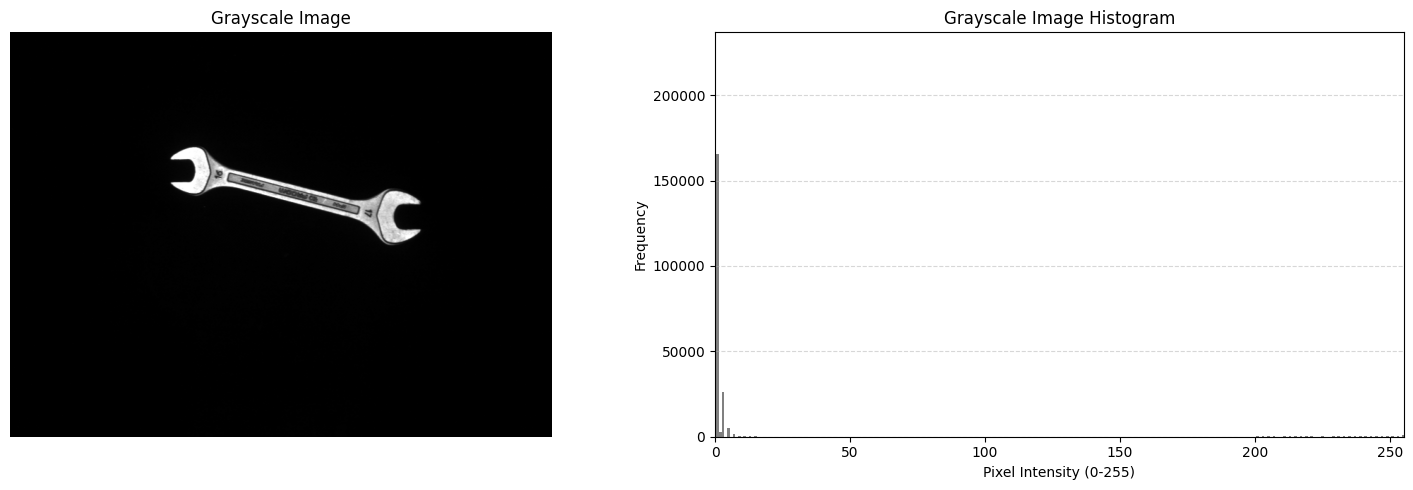

In [426]:
hist = compute_histogram(img)
plot_histogram(img, hist)

Nous pouvons voir sur cet histogramme que les valeurs sont très concentrées vers le 0, ce qui correspond à la couleur noir. Nous pouvons expliquer cela au fond noir de l'image. Les differentes composantes de cette image sont donc le fond noir, et la clé à molette, qui elle est dans différentes nuances de gris.
Nous allons à présent sélectionner une ligne verticale dans l'image afin de la comparer à l'histogramme que nous avons créé. Pour cela, nous sélectionnons une ligne verticale au milieu de l'image, afin d'avoir une partie de la clé et pas que le fond noir.

768


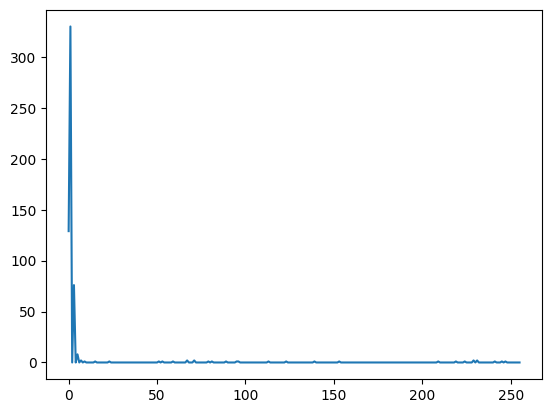

In [427]:
section_img = []
print(len(img[0]))
for i in range(len(img)):
    section_img.append(int(img[i][384]))

section_img = np.array(section_img, dtype=np.uint8)
hist = cv2.calcHist([section_img], [0], None, [256], [0, 256])
plt.plot(hist)

Nous pouvons observer que le bruit est davantage visible que sur le premier histogramme, car nous avons moins de valeurs présentes dans notre tableau. Nous voyons cependant la même tendance que sur l'histogramme réalisé sur l'ensemble de l'image, avec une forme prédominance de valeurs vers le 0, soit vers le noir, et peu de valeurs au delà.

Nous allons à présent analyser les images Key_16_17_D et Key_16_17_L.

### Comparaison des histogrammes

- Effectuez les mêmes manipulations pour les images Key 16 17 L et Key 16 17 D.
- Quelles remarques peut-on faire sur les déplacements de l’histogramme sur l’axe des niveaux de gris ?
- Qu’est ce qui peut avoir changé dans les conditions d’acquisition pour donner ce résultat ?

#### Image key_16_17D

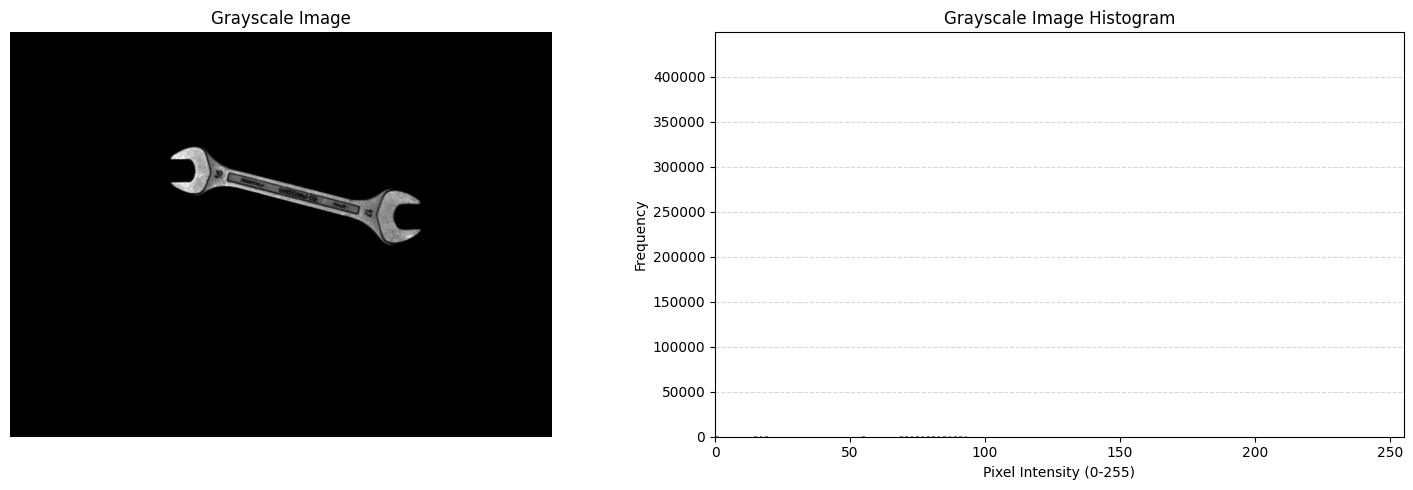

In [428]:
hist = compute_histogram(imgD)
plot_histogram(imgD, hist)

#### Image key_16_17L

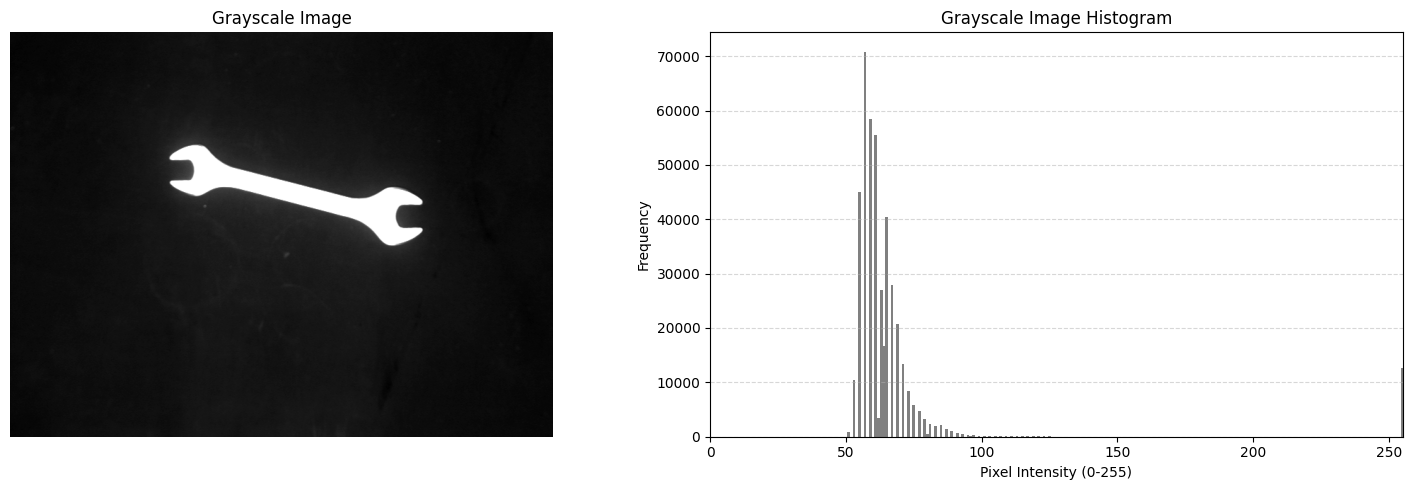

In [429]:
hist = compute_histogram(imgL)
plot_histogram(imgL, hist)

#### Conclusion des 3 histogrammes



Nous pouvons voir que l'image "D" perd les valeurs comprises au niveau de 250, et que la clé à molette est plus sombre sur l'image. Sur l'histogramme, nous ne vonyons que peu de valeurs au delà de 0. Il semblerait donc que l'image soit plus sombre que l'image originale, sûrement le résultat d'une photo prise en sous_exposition. Cette imahe contient que peu de niveau de gris, et la majorité des valeurs se trouvent à 0, soit la majorité des pixels pour cette image seront noirs.

L'image L, par contre, a beaucoup de valeurs dans le gris, entre 50 et 100, et également beaucoup de valeurs aux alentours de 256. Nous pouvons donc déterminer que l'image est en général plus claire que l'image de base, et sur la photo, la clé est très blanche, comme si la photo avait été prise en sur-exposition. Nous pouvons cependant observer que beaucoup de pixels se trouvent dans des nuances de gris, contrairement aux deux images précédentes.

### Par seuillage

- Appliquez un traitement de seuillage aux images Key 16 17_* pour séparer au mieux la clé du fond sur chaque image.
- Décrivez la méthode utilisée et justifiez vos choix.

Ce seuillage, très simple, nous permet de binariser les couleurs de l'image, afin de permettre de détacher la forme du fond. Nous utilisons pour cela un seuil, et toute valeur de pixel au delà de ce seuil prendra la valeur 256, et les autres pixels prendront la valeur 0. Il s'agit d'un seuillage binaire.

In [430]:
### Seuillage binaire
def seuillage_mask(image, seuil):
    image_binaire = np.where(image > seuil, 255, 0)
    return image_binaire.astype(np.uint8)

Pour le choix des seuils, pour l'image D, comme toutes les valeurs pour le fond sont de 0, soit noir, nous prenons la valeur 1 comme seuil. Cela signifie que toutes les valeurs supérieures à 1 prendront la valeur 256, et les autres prendront la valeur 0.
Pour l'image L, nous prenons la valeur 150, car beaucoup de valeurs du fond se situent entre 0 et 100+. Nous considérons donc que 150 sera une bonne valeur pour discriminer le fond de la clé.

In [431]:
imgD_binary = seuillage_mask(imgD, 1)
imgL_binary = seuillage_mask(imgL, 150)

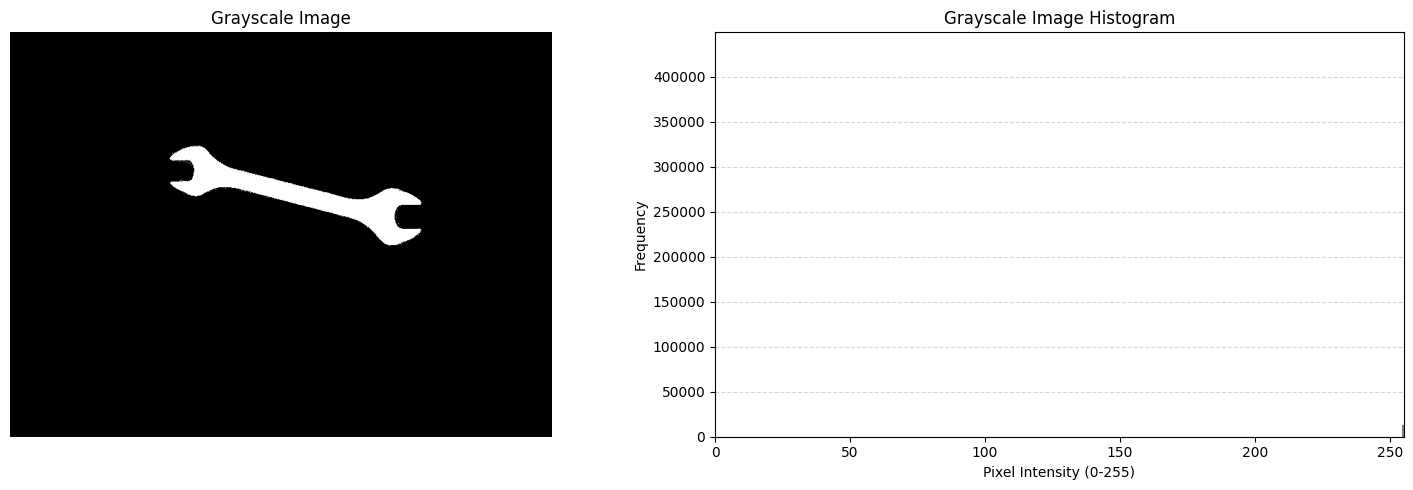

In [432]:
hist = compute_histogram(imgD_binary)
plot_histogram(imgD_binary, hist)

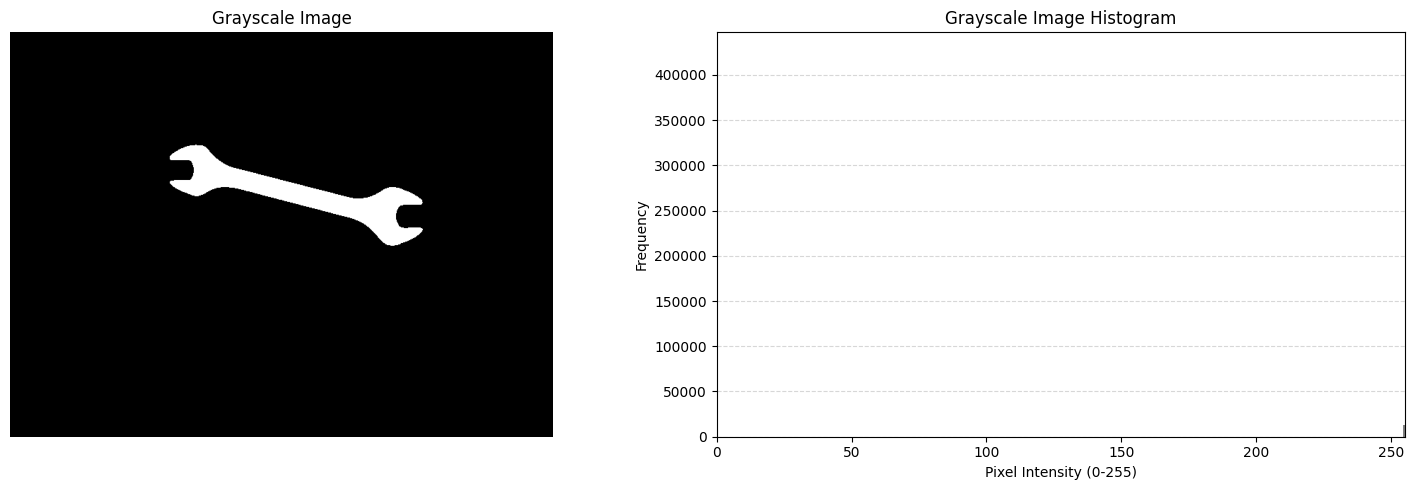

In [433]:
hist = compute_histogram(imgL_binary)
plot_histogram(imgL_binary, hist)

Nous pouvons maintenant constater que les valeurs des pixels sont soit 0, soit 256.

### Comparaison de seuillage

Peut-on à partir de l’histogramme définir les paramètres de seuillage précédents ?
- Testez les fonctions de seuillage automatique (OTSU, . . . ) et relever les valeurs de seuillage calculées automatiquement appliquées aux images Key 16 17 *.
- Comparer à celles fixées manuellement. Que conclure ?

In [434]:
def otsu_threshold(image):
    # Calcul de l'histogramme de l'image
    hist = compute_histogram(image)

    # Normalisation de l'histogramme pour obtenir les probabilités de chaque pixel
    total_pixels = image.size
    probas = hist / total_pixels # probabilité d'aparition pour chaque pixel

    # Calcul de la moyenne globale de l'image
    global_mean = np.mean(image)

    # Initialisation des variables pour le calcul du seuil optimal
    best_threshold = 0
    max_between_class_variance = 0

    # Variables pour stocker les informations sur les classes
    w0 = 0  # Poids de la première classe (pixels <= T)
    w1 = 0  # Poids de la deuxième classe (pixels > T)
    mean0 = 0  # Moyenne de la première classe
    mean1 = 0  # Moyenne de la deuxième classe

    for t in range(256):
        w0 += probas[t]  # Update weight of class 1
        if w0 == 0 or w0 == 1:  # Avoid division by zero
            continue
        w1 = 1 - w0  # Weight of class 2

        mean0 += t * probas[t]  # Update mean of class 1
        mean1 = (global_mean - mean0) / w1  # Compute mean of class 2

        # Compute between-class variance
        between_class_variance = w0 * w1 * (mean0 / w0 - mean1) ** 2

        # Check if the variance is maximized
        if between_class_variance > max_between_class_variance:
            max_between_class_variance = between_class_variance
            best_threshold = t

    # Apply threshold to create binary image
    binary_image = np.where(image > best_threshold, 255, 0).astype(np.uint8)

    return best_threshold, binary_image

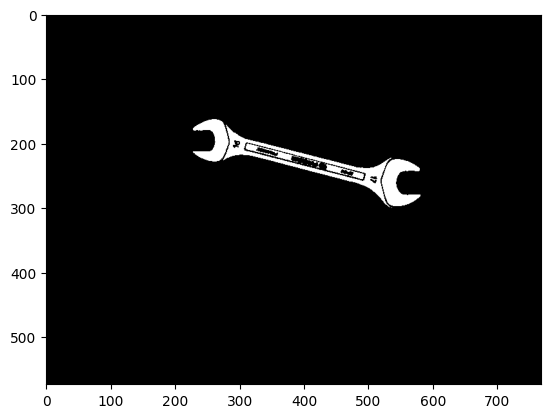

37


In [435]:
best_thresholdD, imgD_otsu = otsu_threshold(imgD)
plt.imshow(imgD_otsu, cmap="gray")
plt.show()
print(best_thresholdD)

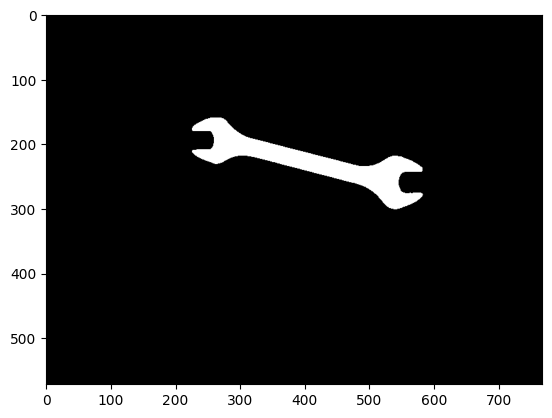

157


In [436]:
best_thresholdL, imgL_otsu = otsu_threshold(imgL)
plt.imshow(imgL_otsu, cmap="gray")
plt.show()
print(best_thresholdL)

Nous pouvons constater pour l'image L que le seuil trouvé automatiquement par l'algorithme Otsu est relativement proche (150 d'après notre observation de l'histogramme, et 157 avec Otsu), ce qui nous fait dire que notre lecture de l'histogramme était pertinente. Nous remarquons cependant que l'image générée avec Otsu est plus nette au niveau des contours, nous avions en effet quelques pixels parasites avec notre seuil à 150. Pour l'image D, le seuil se situe à 37 avec Otsu, contre 1 avec notre méthode manuelle, ce qui permet de mettre en exergue les détails de la clé, contrairement à notre approche où seul les contours de la clés étaient visibles.

## Pré-traitement avant contrôle dimensionnel
Dans cette première étape, l’objectif est d’extraire automatiquement une méthode de traitement d’image afin de préparer nos images à un contrôle de dimension
automatique sur l’ensemble des images Key *. Pour cela un pré-traitement des images et une définition de région d’intérêt est judicieux.

### Délimitation de la zone d’intérêt (ROI)
- Sachant que la clé est toujours positionnée approximativement au même endroit dans l’image, définissez une région d’intérêt (ROI) pertinente pour limiter l’analyse aux zones utiles et réduire le bruit.
- Justifier votre choix.

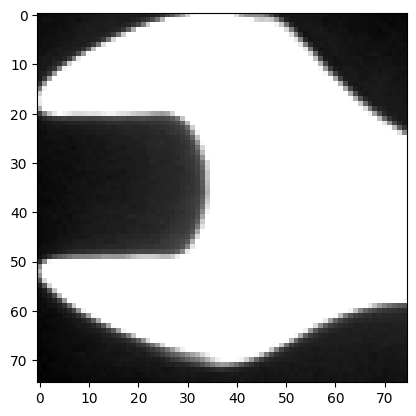

In [437]:
cnts = cv2.findContours(imgL_otsu, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    ROI = [y, y+h, x, x+w]

imgL = imgL[ROI[0]:ROI[1], ROI[2]:ROI[3]]
imgL = imgL[0:75, 0:75]
plt.imshow(imgL, cmap="gray")

img = img[ROI[0]:ROI[1], ROI[2]:ROI[3]]
imgL = imgL[0:75, 0:75]

imgD = imgD[ROI[0]:ROI[1], ROI[2]:ROI[3]]
imgD = imgD[0:75, 0:75]

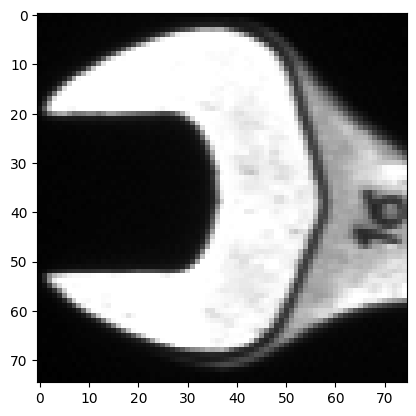

In [438]:
import os

dict_img = {}

for file in os.listdir(path):
    if file.endswith(".tif") and file!="Etalon_45.tif":
        dict_img[file] = cv2.imread(f"{path}/{file}", cv2.IMREAD_GRAYSCALE)
        dict_img[file] = dict_img[file][ROI[0]:ROI[1], ROI[2]:ROI[3]]
        dict_img[file] = dict_img[file][0:75, 0:75]
        plt.imshow(dict_img[file], cmap="gray")

### Choix d’une méthode de seuillage automatique
- Sélectionnez une méthode automatique de seuillage permettant de segmenter la clé du fond.
- Expliquez votre choix en fonction des variations possibles des conditions d’acquisition (éclairage, contraste, etc.) sur les images Key_*(Vous pouvez vous aider de la partie 1.1).
- Appliquez cette méthode à l’image Key_16_17 et observez les résultats sur la ROI définie auparavant.

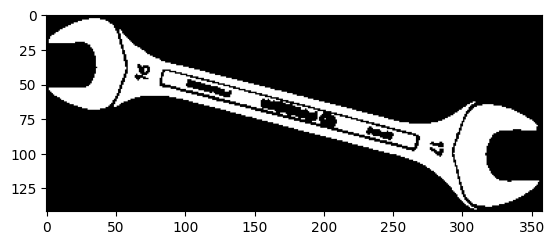

In [439]:
threshold, img_otsu = otsu_threshold(img)
plt.imshow(img_otsu, cmap="gray")

Nous conservons la methode Otsu, puisque la clé tend à se détacher très fortement du fond, et à être suffisamment éclairée pour que l'on puisse bien discerner la largeur de serrage. Nous aurions pu utiliser le seuillage adaptatif si les clés elles-mêmes étaient éclairées de manière inégales.

### Analyse de la robustesse
- Testez votre méthode de seuillage sur plusieurs images de la série Key_16_17_* afin d’évaluer sa robustesse face aux variations des conditions d’acquisition.
- Identifiez les éventuels problèmes (perte d’information, mauvaise segmentation, sensibilité au bruit) et proposez des ajustements si nécessaire.

Nous avons pu voir, sur l'image complète, et notamment dans le cas où la clé est sous-exposée, que nous avons plus de mal à détecter les contour de la clé, et notamment ceux de la largeur de serrage. Nous allons cependant voir si notre resize au niveau de la ROI permet d'aider à contourner ce problème.

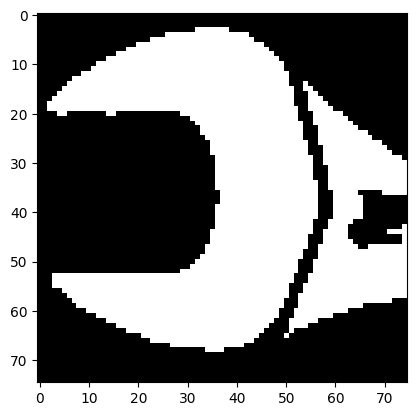

In [440]:
best_thresholdD, imgD_otsu = otsu_threshold(imgD)
plt.imshow(imgD_otsu, cmap="gray")
plt.show()

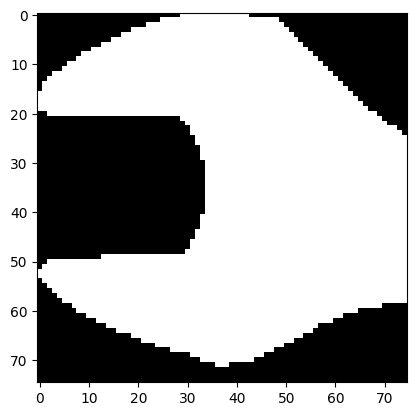

In [441]:
best_thresholdL, imgL_otsu = otsu_threshold(imgL)
plt.imshow(imgL_otsu, cmap="gray")
plt.show()

Puisque notre image est plus resserrée autour de la clé, nous gagnons en précision. Cependant, nous constatons que la clé sur-exposée est moins bien définie que la clé sous-exposée, avec une largeur de serrage qui semble plus petite que sur l'image normale, et l'image sous-exposée. Nous remarquons également quelques petits défauts sur la largeur de serrage de la clé sous-exposée.

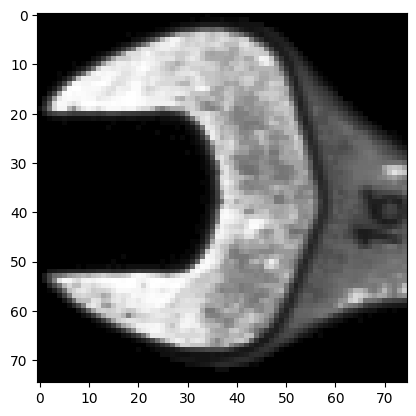

In [442]:
equalized_imgD = cv2.equalizeHist(imgD)
plt.imshow(equalized_imgD, cmap="gray")
plt.show()

## Application au problème de contrôle dimensionnel
L’étape précédente vous à permis de sélectionner une ROI et de binariser votre
image afin de la préparer au contrôle dimensionnel. Dans cette partie nous allons
donc aborder la partie de contrôle dimensionnel automatique pour résoudre le
problème de l’usine et trouver les différentes tailles de clés à molette associées
aux images Key_* :

### Calibration
- La première opération consiste à effectuer la calibration de l’image
en utilisant l’image Etalon 45. Cette image représente une pièce de
diamètre égal à 45 mm précisément, positionnée à trois endroits.
- A l’aide de la méthode de votre choix, trouvez la résolution mm/pixel
obtenue. Expliquer votre démarche.

In [443]:
def detect_circles_and_calculate_resolution(image, known_diameter_mm=45):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian Blur to reduce noise and improve detection
    blurred = cv2.GaussianBlur(gray, (9, 9), 2)

    # Apply Hough Circle Detection
    circles = cv2.HoughCircles(
        blurred,
        cv2.HOUGH_GRADIENT,
        dp=1.2,
        minDist=50,
        param1=50,
        param2=30,
        minRadius=10,
        maxRadius=200
    )

    if circles is not None:
        circles = np.uint16(np.around(circles[0, :]))  # Rounding circle values

        # Store all detected diameters
        diameters = [2 * r for x, y, r in circles]

        # Calculate the mean diameter
        mean_diameter_in_pixels = np.mean(diameters)

        # Calculate resolution in mm/pixel
        resolution = known_diameter_mm / mean_diameter_in_pixels

        # Draw all circles detected
        for x, y, r in circles:
            cv2.circle(image, (x, y), r, (0, 255, 0), 2)
            cv2.circle(image, (x, y), 2, (0, 0, 255), 3)

        return image, resolution, circles

    return image, None, None

In [444]:
image = cv2.imread(f'{path}/Etalon_45.tif')
processed_image, resolution, circles = detect_circles_and_calculate_resolution(image)

if resolution:
    print(f"Resolution: {resolution} mm/pixel")
    print(f"Number of Circles Detected: {len(circles)}")
else:
    print("No circles detected.")

Resolution: 0.5075187969924811 mm/pixel
Number of Circles Detected: 3


### Choix d’une méthode de contrôle automatique
- La seconde opération est de trouver un moyen pour mesurer la largeur de serrage de la clé de l’image Key 16 17. Vous pouvez appliquer un ou plusieurs traitements (détection de contours, ...) pour mettre en évidence la zone de mesure. Vous pouvez par exemple utiliser un ou plusieurs profils de lignes pour cette mesure.
- Expliquez la méthode utilisée et le résultat obtenu.
- Appliquez votre algorithme aux autres clés pour mesurer leur largeur de serrage.
- Donner les limites (précision, éclairage, . . . ) de votre méthode.

fichier : Key_16_17_L.tif


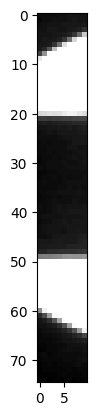

fichier : Key_8_9.tif


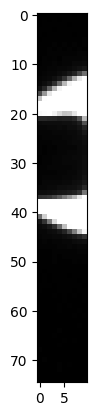

fichier : Key_20_22.tif


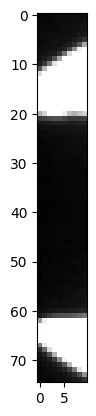

fichier : Key_12_13.tif


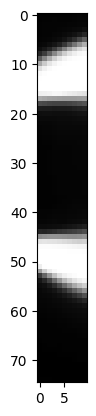

fichier : Key_16_17_D.tif


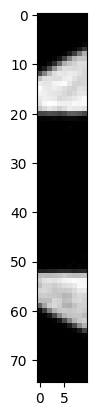

fichier : Key_14_15.tif


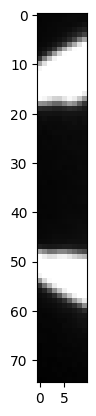

fichier : key_16_17.tif


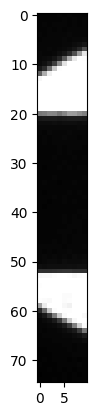

In [445]:
for wrench in dict_img.keys():
    img = dict_img[wrench]
    section_img = []

    print(f"fichier : {wrench}")
    for i in range(len(img)):
        section_img_lines = []
        for j in range(8, 18):
            section_img_lines.append(int(img[i][j]))
        section_img.append(section_img_lines)

    img = np.array(section_img)
    plt.imshow(img, cmap="gray")
    plt.show()

    dict_img[wrench] = img

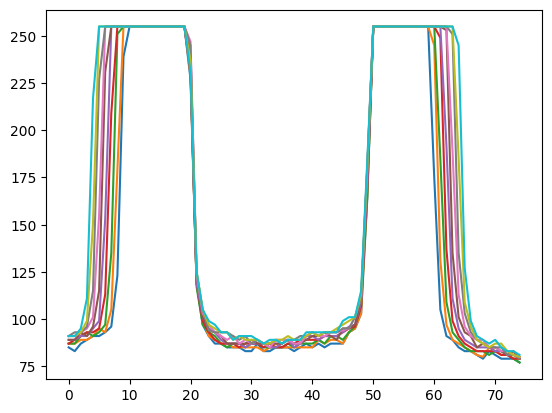

La clé du fichier Key_16_17_L.tif a une largeur de 12.687969924812029 mm


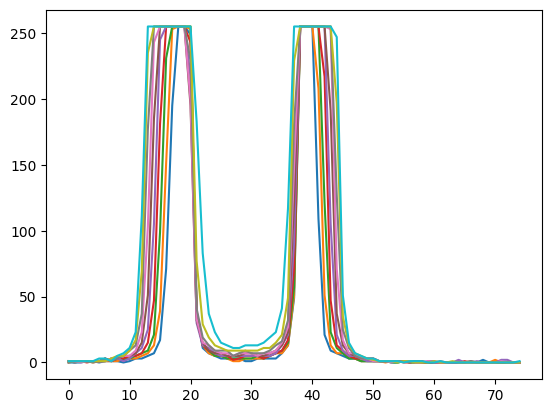

La clé du fichier Key_8_9.tif a une largeur de 8.120300751879698 mm


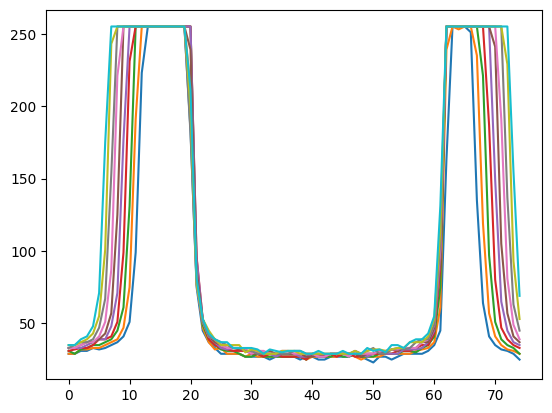

La clé du fichier Key_20_22.tif a une largeur de 20.808270676691727 mm


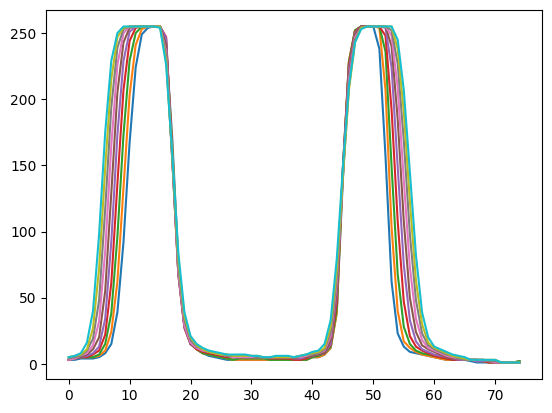

La clé du fichier Key_12_13.tif a une largeur de 13.70300751879699 mm


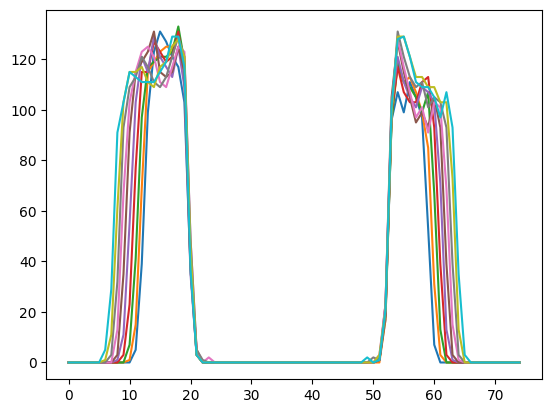

La clé du fichier Key_16_17_D.tif a une largeur de 17.25563909774436 mm


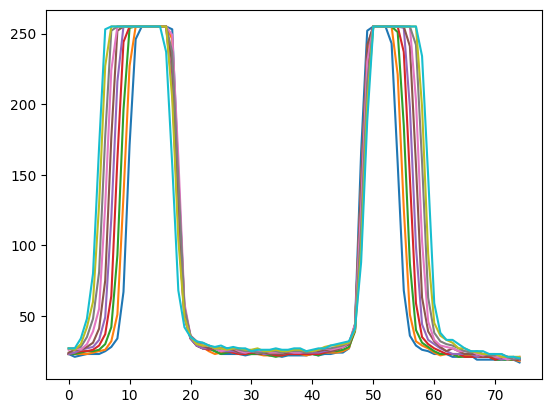

La clé du fichier Key_14_15.tif a une largeur de 14.718045112781953 mm


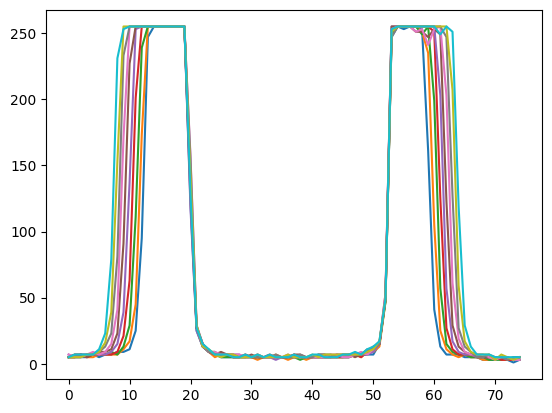

La clé du fichier key_16_17.tif a une largeur de 16.240601503759397 mm


In [446]:
def calculate_gap(list_pixels:list):
    index_haut = 0
    index_bas = 0

    for i in range(len(list_pixels)-1):
        if list_pixels[i] >= 100:
            if list_pixels[i+1] < 100:
                index_haut = i
                break

    for i in range(index_haut, len(list_pixels)-1):
        if list_pixels[i] < 100:
            if list_pixels[i+1] >= 100:
                index_bas = i
                break

    return index_bas - index_haut

for wrench in dict_img.keys():
    img = dict_img[wrench]
    mean_line = [round(sum(line) / float(len(line))) for line in img.tolist()]
    plt.plot(img)
    plt.show()

    width = calculate_gap(mean_line)
    print(f"La clé du fichier {wrench} a une largeur de {width*resolution} mm")